In [11]:
import numpy as np
from generate_solver_dynamic import get_forces_solver_dynamic
from python_sim_utils import   plotter, plot_pajecka, compute_objective
import matplotlib.pyplot as plt
import InterpolateTrack
import yaml

table generated with npoints =  2453


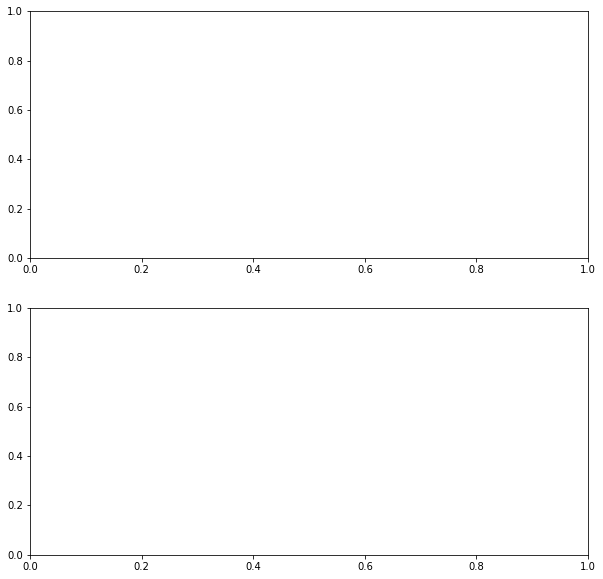

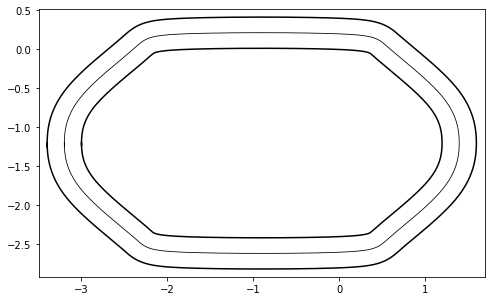

In [13]:
paramfile = "parameters/modelparams.yaml"
with open(paramfile) as file:
        params = yaml.load(file, Loader= yaml.FullLoader)
lf = params['lf'] #[m]
lr = params['lr'] #[m]
lencar = lf+lr
r = 0.2
track_lu_table, smax = InterpolateTrack.generatelookuptable("tracks/indi500xd")
trk_plt = plotter(track_lu_table, smax, r, lencar)
trk_plt.plot_track()

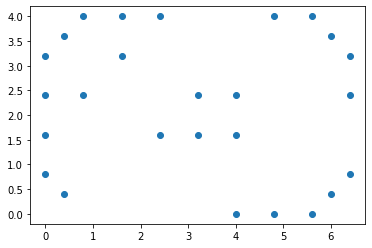

In [3]:
trackx = 8*np.array([0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, \
                  0.8 ,0.5 ,0.8 ,0.8, 0.75, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.0, 0.0, 0.0, 0.0 ]) 
tracky = 8*np.array([0.05, 0.3, 0.4, 0.2, 0.2, 0.0, 0.0, 0.0, 0.05, \
                  0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.5, 0.3, 0.3, 0.5, 0.5, 0.5, 0.45, 0.4, 0.3, 0.2, 0.1 ]) 
waypoints = np.vstack([trackx,tracky]).T
plt.scatter(trackx, tracky)
np.savetxt('tracks/sample_track.csv', waypoints, delimiter = ', ')

In [3]:
a = np.array([1,2,3,4,4,5,6,6,7,8,9])
b = np.delete(a,[2,3,4,5])

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import matplotlib

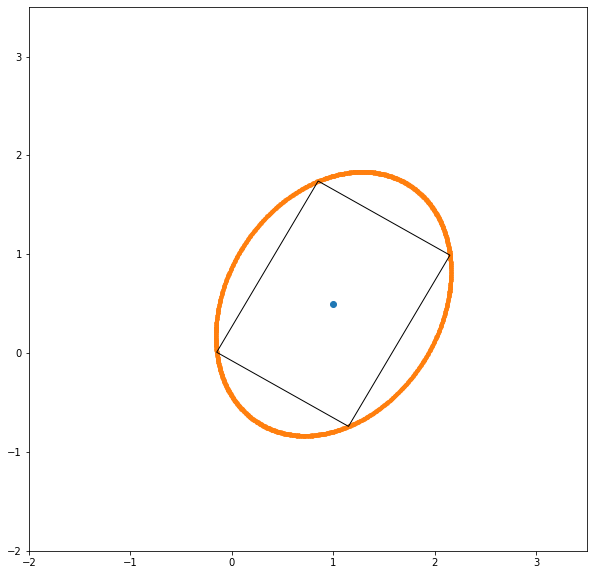

In [49]:
deg2rad = 3.14159/180
rad2deg = 1/deg2rad
phi_ob = 60 * deg2rad
lob = 2 
wob = 1.5 
xob = 1
yob = 0.5

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
tr = matplotlib.transforms.Affine2D().rotate_deg_around(xob, yob, phi_ob*rad2deg)
ts = ax.transData
t = tr + ts

obst = patches.Rectangle((xob-lob/2, yob-wob/2),lob, wob,\
        linewidth=1,edgecolor='k',facecolor='none', transform= t)
obst = ax.add_patch(obst)
ax.scatter(xob,yob)
ax.set_xlim([-2,3.5])
ax.set_ylim([-2,3.5])

def implicit_ellipse(x,y,xc,yc,phi, a, b):
    dx = x-xc
    dy = y-yc
    s = np.sin(phi)
    c = np.cos(phi)
    return (1/a**2)*np.square(c*dx+s*dy)+(1/b**2)*np.square(s*dx-c*dy)

x = np.linspace(-1,3, 1000)
y = np.linspace(-1,3, 1000)
coords = []
for idx1 in range(len(x)):
    for idx2 in range(len(y)):
        coords.append(np.array([x[idx1], y[idx2]]))
coords = np.array(coords)
scalar = np.sqrt(2)
funcvals = implicit_ellipse(coords[:,0], coords[:,1], xob, yob, phi_ob, scalar*lob/2 , scalar*wob/2)
idx = np.where(funcvals<1.02)
coords = coords[idx]
idx = np.where(funcvals[idx]>0.98)
coords = coords[idx]
ax.scatter(coords[:,0],coords[:,1], s = 1)

In [20]:
coords.shape


(10000, 2)

(-2.0, 2.0)

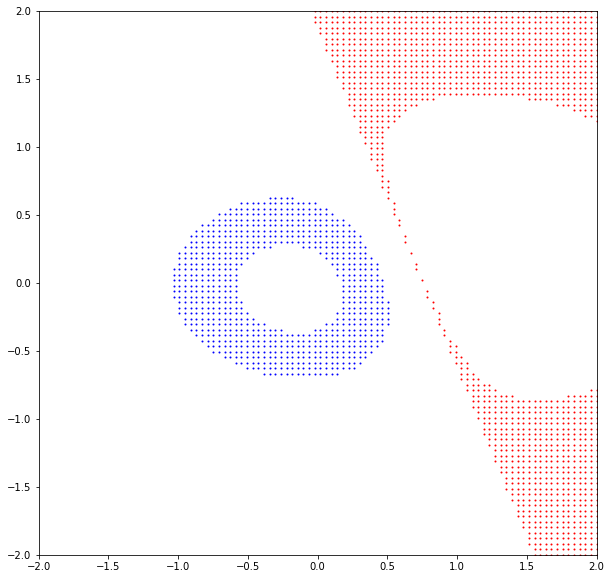

In [60]:
#cost bump shit
import numpy as np
import matplotlib.pyplot as plt

'x_ob', 'y_ob', 'phi_ob', 'alpha_0', 'alpha_1', 'a_01', 'a_02', 'a_11', 'a_12', 'mu_t_x', 'mu_t_y'
def cost_bump(x, y):
    x_ob = 0
    y_ob = 0
    cent1 = np.array([x_ob, y_ob])
    x_pos = np.array([x, y])
    phi_ob = 0*3.14159/2
    mu_t_x = 1
    mu_t_y = 0.2
    
    
    a_01 = 1.0
    a_02 = 2.0
    
    a_11 = 1.0
    a_12 = 2.0

    Trot = np.array([[np.cos(phi_ob), -np.sin(phi_ob)],[np.sin(phi_ob), np.cos(phi_ob)]]).T
    cent2 = Trot.T@np.array([mu_t_x, mu_t_y]) + cent1
    A0 = np.array([[a_01, 0],[0, a_02]])
    A0 = Trot.T@A0@Trot
    A1 = np.array([[a_11, 0],[0, a_12]])
    val = 3*np.exp(-(x_pos-cent1).T@A0@(x_pos-cent1)) - 2*np.exp(-(x_pos-cent2).T@A1@(x_pos-cent2))
    return val

x = np.linspace(-2,2, 100)
y = np.linspace(-2,2, 100)
coords = []
funcvals = []
for idx1 in range(len(x)):
    for idx2 in range(len(y)):
        coords.append(np.array([x[idx1], y[idx2]]))
        funcvals.append(cost_bump(x[idx1], y[idx2]))
coords = np.array(coords)

funcvals = np.array(funcvals)
idx = np.where(funcvals<2)
coords1 = coords[idx]
idx = np.where(funcvals[idx]>0.98)
coords1 = coords1[idx]

idx = np.where(funcvals<0)
coords2 = coords[idx]
idx = np.where(funcvals[idx]>-0.1)
coords2 = coords2[idx]

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
ax.scatter(coords1[:,0],coords1[:,1], s = 1, c = 'b')
ax.scatter(coords2[:,0],coords2[:,1], s = 1, c = 'r')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])


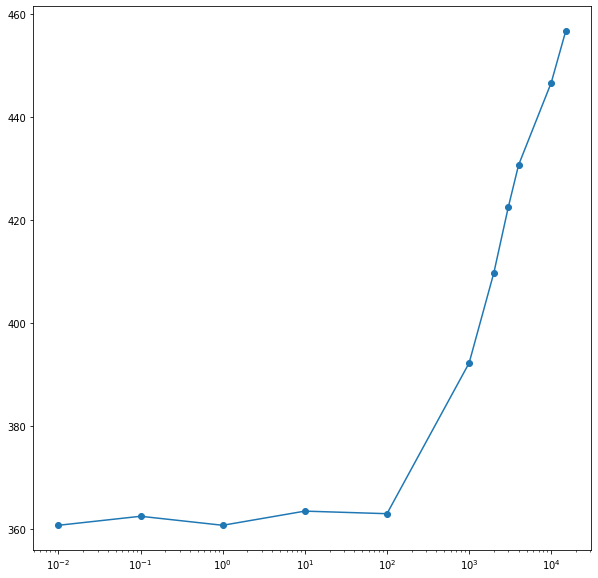

In [11]:
import numpy as np
import matplotlib.pyplot as plt


Qc = np.array([ 
0.01,
0.1, 
1.0,  
10.0,
100.0,
1000.0,
2000.0,
3000.0,
4000.0,  
10000.0,
15000.0    
])

Laptimes = []
Laptimes.append([359, 360, 362, 362])
Laptimes.append([359, 370, 360, 361])
Laptimes.append([359, 360, 362, 362])
Laptimes.append([367, 361, 360, 366])
Laptimes.append([363, 365, 361, 363])
Laptimes.append([392, 392, 393, 392])
Laptimes.append([410, 409, 410, 410])
Laptimes.append([422, 424, 422, 422])
Laptimes.append([431, 431, 430])
Laptimes.append([447, 446, 447])
Laptimes.append([457, 456, 457])

for idx in range(len(Laptimes)):
    Laptimes[idx] = np.array(Laptimes[idx]).mean()
    
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
plt.semilogx(Qc,Laptimes, linestyle='-')
plt.scatter(Qc,Laptimes)

In [4]:
Laptimes

[360.75,
 362.5,
 360.75,
 363.5,
 363.0,
 392.25,
 409.75,
 422.5,
 430.6666666666667,
 446.6666666666667]